
# [LAB3] Entrega do Lab3 - T1_Grupo_BB
## ENUNCIADO

Usando o mesmo projeto de visualização do Lab2, e até mesmo partindo dos mesmos artefatos de software desenvolvidos para o Lab2, o grupo deve experimentar outros tipos de visualização que funcionem no contexto do projeto. Após experimentar, o grupo deverá eleger a melhor visualização produzida e fazer o envio apenas desta escolhida como a melhor. A única exigência é que o tipo de visualização seja diferente do tipo explorado e entregue no Lab2.




## Preparando Setup

In [219]:
!pip install suntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
import math
import datetime 
import numpy as np
import pandas as pd 
from suntime import Sun 
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 

## Lendo arquivo e dando primeira olhada nos dados.

In [222]:
plane_data = pd.read_csv('/content/drive/MyDrive/vdd/Airplane_crashes_dataset_since_1908 - Airplane_crashes_dataset_since_1908.csv')
plane_data.head()

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,all_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Criando funções necessárias para criação de colunas.

In [223]:
def format_all_data(val):
  location = val.split(',')[-1]
  if 'Brazil' in location:
    return 1
  else: return 0

def create_city_name(val):
  exceptions = {'Rio de Janerio': 'Rio de Janeiro', 'Sao Paolo':'Sao Paulo', 
                'Florianpolis': 'Florianopolis', 'Ribeirao':'Ribeirao Preto', 
                'Rio Bonito': 'Rio de Janeiro'}

  cidades = ['Rio de Janeiro', 'Sao Paulo','Fernando de Noronha', 'Rio Doce','Jaquirana', 'Taquaracucu',
          'Porte Alegre', 'Algrete','Londrina', 'Rancharia','Carolina', 'Salvador','Caparao Mountain', 'Anchieta Island',
          'Curitiba', 'Campina Grande','Pelotas', 'Recife','Campinas', 'Vitoria','Paraibuna', 'Brasilia',
          'Itapecerica da Serra', 'Pico da Caledonia','Cuiaba', 'Coari','Sena Madureira', 'Sao Luis',
          'Guanabara', 'Florianopolis','Pacatuba', 'Vitória da Conquista','Mantiqueira', 'Vila dos Remidos',
          'Guarulhos', 'Sao Jose do Xingu','Bauru', 'Altamira','Guaratingueta AB', 'Caetite','Cruzeiro do Sul', 'Tangara de Serra',
          'Formoso do Aragala', 'Carajas','Suzano', 'Ribeirao Preto','Belelm', 'Cubatao','Rio Branco', 'Belem','Para', 'Macaé',
          'Uberaba', 'Sao Felix do Araguaia','Manacapuru', 'Natal','Senador Jose Porfírio', 'Manaus','Atlantic Ocean']
  
  for cidade in exceptions.keys():
    if cidade in val:
      return exceptions[cidade]

  for cidade in cidades:
    if cidade in val:
      return cidade

def create_coordinates(val):

  coordenadas = {'Rio de Janeiro': [-22.908, -43.18], 'Sao Paulo': [-23.547, -46.633],'Fernando de Noronha': [-3.823, -32.065], 
                 'Rio Doce': [-20.242, -42.907],'Jaquirana': [-28.885, -50.358], 'Taquaracucu': [-27.4, -53.467],
                 'Porte Alegre': [-30.033, -51.23], 'Algrete':[-29.784, -55.791],'Londrina': [-23.31, -51.163], 
                 'Rancharia': [-22.229, -50.893],'Carolina': [-7.333, -47.469], 'Salvador': [-13, -38.517],
                 'Caparao Mountain': [-20.521, -41.907], 'Anchieta Island': [-23.539, -45.065],
                 'Curitiba': [-25.430, -49.272], 'Campina Grande': [-7.230, -35.881],'Pelotas': [-31.772, -52.343], 
                 'Recife': [-8.054, -34.881],'Campinas': [-22.905, -47.061], 'Vitoria': [-20.319, -40.338],
                 'Paraibuna': [-23.386, -45.662], 'Brasilia': [-15.794, -47.883],'Itapecerica da Serra': [-23.717, -46.849],
                 'Pico da Caledonia': [-22.360, -42.574],'Cuiaba': [-15.596, -56.097], 'Coari': [-4.085, -63.141],
                 'Sena Madureira': [-9.066, -68.657], 'Sao Luis': [-2.53, -44.303],'Guanabara': [-22.883, -43.104], 
                 'Florianopolis': [-27.597, -48.549],'Pacatuba': [-3.984, -38.62], 'Vitória da Conquista': [-14.866, -40.839],
                 'Mantiqueira': [-22.468, -45.003], 'Vila dos Remidos': [-3.845, -32.411],'Guarulhos': [-23.463, -46.533], 
                 'Sao Jose do Xingu': [-10.804, -52.744],'Bauru': [-22.315, -49.061], 'Altamira': [-3.203, -52.206],
                 'Guaratingueta AB': [-22.816, -45.193], 'Caetite': [-14.069, -42.475],'Cruzeiro do Sul': [-7.631, -72.67], 
                 'Tangara de Serra': [-14.619, -57.486],'Formoso do Aragala': [-11.802, -49.528], 'Carajas': [-6.108, -50.304],
                 'Suzano': [-23.543, -46.311], 'Ribeirao Preto': [-21.178, -47.81],'Belelm': [-1.456, -48.504], 
                 'Cubatao': [-23.895, -46.425],'Rio Branco': [-9.971, -67.811], 'Belem': [-1.456, -48.504],
                 'Para': [-1.456, -48.504], 'Macaé': [-22.371, -41.787],'Uberaba': [-19.748, -47.932], 
                 'Sao Felix do Araguaia': [-11.617, -50.669],'Manacapuru': [-3.300, -60.620], 'Natal': [-5.795, -35.209],
                 'Senador Jose Porfírio': [-2.591, -51.954], 'Manaus': [-3.074, -60.005],'Atlantic Ocean': [3.578, -30.399]}
  
  if val in coordenadas.keys():
    return coordenadas[val]
  else: return np.nan


def format_time(val):
  neo_val = ''
  for c in val:
    if c.isdigit():
      neo_val = neo_val + c
  
  val_format = int(neo_val) if val != '' else None
  
  return val_format

def dia_ou_noite(df):
  meses = {'January':1,'February':2,'March':3,'April':4,
           'May':5,'June':6,'July':7,'August':8,'September':9,
           'October':10,'November':11,'December':12}

  mes_sum = [0,31,28,31,30,31,30,31,31,30,31,30]

  df['nascer'] = None
  df['por'] = None
  
  for i in range(len(df)):
    ano = int(df.iloc[i]['date'].split(',')[1])
    mes = int(meses[df.iloc[i]['date'].split(',')[0].split()[0]])
    dia = int(df.iloc[i]['date'].split(',')[0].split()[1])

    geolocator = Nominatim(user_agent="geoapiExercises") 
    place = "brazil"
    location = geolocator.geocode(place) 
    latitude = df.iloc[i]['coordenadas'][0] 
    longitude = df.iloc[i]['coordenadas'][1]
    sun = Sun(latitude, longitude)
    time_zone = datetime.date(ano, mes,dia) 
    sun_rise = sun.get_local_sunrise_time(time_zone) 
    sun_dusk = sun.get_local_sunset_time(time_zone) 
    
    df.loc[i,'nascer'] = int(sun_rise.strftime("%H%M"))
    df.loc[i,'por'] = int(sun_dusk.strftime("%H%M"))

def format_date(val):
  date_format = val.split(', ')[1]
  return date_format[:3] + '0'

def dia_ou_noite_bin(df):
  df['dia_ou_noite'] = None
  for i in range(len(df)):
    if (df['dn'].iloc[i] >= df['nascer'].iloc[i] and df['dn'].iloc[i] <= df['por'].iloc[i]):
      df.loc[i,'dia_ou_noite'] = 1
    else: df.loc[i,'dia_ou_noite'] = 0

## Iniciando formatação/Criação de colunas necessarias paraa visualização.

In [224]:
used_data = plane_data[['date', 'time','location']]
used_data.replace('?', np.nan,inplace = True)
used_data.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [225]:
used_data['brazil'] = used_data['location'].apply(format_all_data)
used_data = used_data[used_data['brazil'] == 1]
used_data['cidade'] = used_data['location'].apply(create_city_name)
used_data['decada'] = used_data['date'].apply(format_date)
used_data['coordenadas'] = used_data['cidade'].apply(create_coordinates)
used_data.reset_index(inplace=True)
used_data.dropna(inplace = True)
dia_ou_noite(used_data)
used_data['dn'] = used_data['time'].apply(format_time)
dia_ou_noite_bin(used_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [226]:
used_data.head()

,index,date,time,location,brazil,cidade,decada,coordenadas,nascer,por,dn,dia_ou_noite
0,341,"December 03, 1928",08:00,"Near Rio de Janeiro,Brazil",1,Rio de Janeiro,1920,"[-22.908, -43.18]",759,2127,800,1
1,1015,"May 22, 1938",1340,"Sao Paulo, Brazil",1,Sao Paulo,1930,"[-23.547, -46.633]",937,2030,1340,1
2,1131,"August 13, 1939",1635,"Rio de Janerio, Brazil",1,Rio de Janeiro,1930,"[-22.908, -43.18]",919,2036,1635,1
3,1203,"January 15, 1941",1205,"Off Fernando de Noronha, Brazil",1,Fernando de Noronha,1940,"[-3.823, -32.065]",808,2027,1205,1
4,1303,"September 28, 1942",900,"Near Sao Paulo, Brazil",1,Sao Paulo,1940,"[-23.547, -46.633]",850,2104,900,1


In [227]:
dia = used_data[used_data['dia_ou_noite'] == 1]
noite = used_data[used_data['dia_ou_noite'] == 0]

## Preparando visualização.

In [228]:
dia_list = list(dia.groupby('decada').count()['dn'])
noite_list =  [0,0] + list(noite.groupby('decada').count()['dn']) + [0]

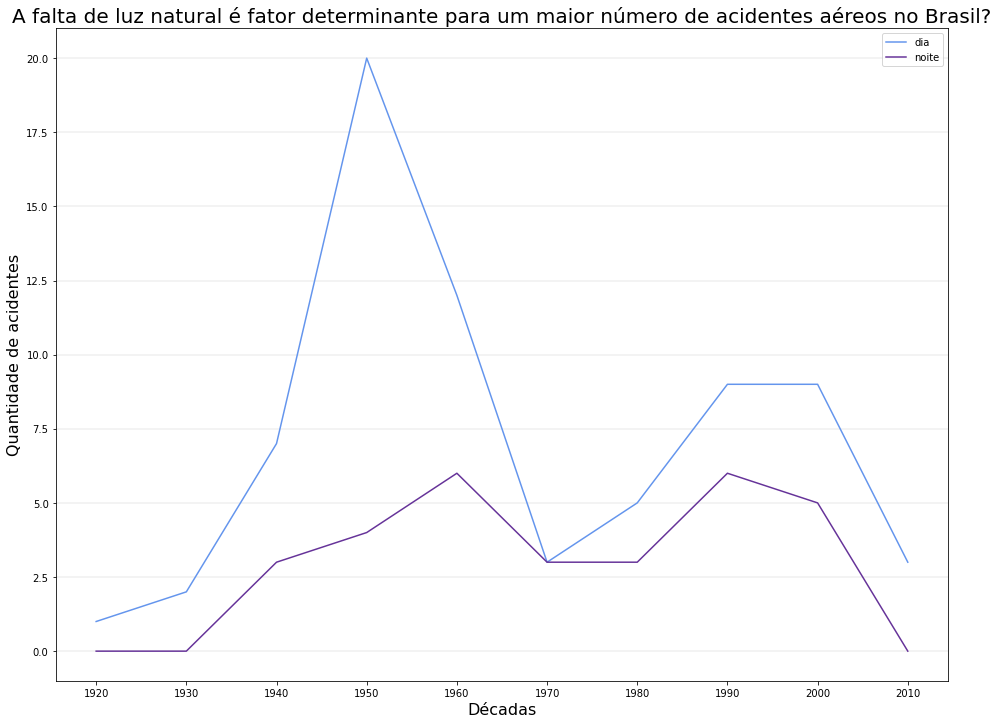

In [232]:
dia_list = list(dia.groupby('decada').count()['dia_ou_noite'])
noite_list = [0,0] + list(noite.groupby('decada').count()['dia_ou_noite']) + [0]

fig = plt.figure(figsize=(16,12))
plt.plot(dia['decada'].unique(), dia_list, label = 'dia', color = 'cornflowerblue')
plt.plot(dia['decada'].unique(), noite_list, label = 'noite', color = 'rebeccapurple')

plt.legend()

plt.ylabel("Quantidade de acidentes", fontdict={"fontsize": "16", "fontweight" : "6"})
plt.xlabel("Décadas", fontdict={"fontsize": "16", "fontweight" : "6"})
plt.title("A falta de luz natural é fator determinante para um maior número de acidentes aéreos no Brasil?", fontdict={"fontsize": "20", "fontweight" : "6"})
plt.grid(axis='y', linewidth=0.3)